# field centers

In [1]:
import pyfits as pf
# load catalogs
import pickle
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=3)
        
def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')


import numpy as np
#save_obj('/global/cfs/cdirs/des/mgatti/BFD_CAT_V1',catalog)

%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def load_obj(name):
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
   
#des scheme
colors = ['#601A4A', '#EE442F','#63ACBE']




/global/homes/m/mgatti/.conda/envs/bfd_env3/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
m = pf.open('//global/cfs/cdirs/des/mgatti/exposure_field_centers.fits')

import treecorr

Nbins = 20

min_theta = 2.5/60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.01


conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }

# laod BFD catalog ----
catalog = load_obj('/global/cfs/cdirs/des/mgatti/BFD_CAT_V1')
cat_data = treecorr.Catalog(ra=catalog['ra'], dec=catalog['dec'], g1=catalog['e1']-np.mean(catalog['e1']), g2=catalog['e2']-np.mean(catalog['e2']),ra_units='deg', dec_units='deg',npatch=100)

# load lenses ----
cat_a = treecorr.Catalog(ra=m[1].data['RA_CENT'], dec=m[1].data['DEC_CENT'],ra_units='deg', dec_units='deg',npatch=100)
ng = treecorr.NGCorrelation(conf,var_method='jackknife')
ng.process(cat_a,cat_data)


# random 
r = pf.open('/global/cfs/cdirs/des/y6-shear-catalogs/y6-combined-hsmap_random.fits')

cat_random = treecorr.Catalog(ra=r[1].data['ra'], dec=r[1].data['dec'],ra_units='deg', dec_units='deg',npatch=100)
rg = treecorr.NGCorrelation(conf,var_method='jackknife')
rg.process(cat_random,cat_data)




gammat,gammat_im,gammaterr=ng.calculateXi(rg) 
covj = ng.estimate_cov('jackknife')
save_obj('field_centers',[gammat,gammat_im,gammaterr,covj])


In [ ]:
from Moments_analysis import apply_random_rotation,addSourceEllipticity,convert_to_pix_coord
import healpy as hp


# a
nside_out = 2048
pix = convert_to_pix_coord(ra,dec,nside_out)

e1 = np.zeros(hp.nside2npix(nside_out))
e2 = np.zeros(hp.nside2npix(nside_out))
n_map = np.zeros(hp.nside2npix(nside_out))



unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
n_map[unique_pix] += np.bincount(idx_rep, weights=w)
e1[unique_pix] += np.bincount(idx_rep, weights=w*(g1-np.mean(g1)))
e2[unique_pix] += np.bincount(idx_rep, weights=w*(g2-np.mean(g2)))


mask = n_map!=0
e2[mask] = e2[mask]/n_map[mask]
e1[mask] = e1[mask]/n_map[mask]

E,B,_ = g2k_sphere(e1, e2, e1==e1, nside=nside_out, lmax=nside_out*2)

EE = hp.sphtfunc.smoothing(E,60./60/57)
hp.mollview(EE)


NameError: name 'ng' is not defined

In [4]:
th

array([  2.83475798,   3.56919653,   4.49460184,   5.65687804,
         7.12202473,   8.9643232 ,  11.2897421 ,  14.21127705,
        17.88905756,  22.52268946,  28.35237505,  35.69601749,
        44.93065291,  56.54409364,  71.21283072,  89.65324564,
       112.83951733, 142.06903748, 178.80803459, 225.12560688])

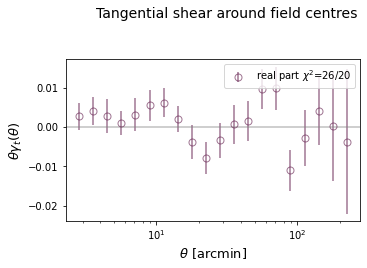

25.536091882627364 0.18168556869669314 0.9089601951925681


In [10]:
gammat,gammat_im,gammaterr,covj,ng = load_obj('field_centers')
th  = ng.meanr*60

fig, ax = plt.subplots(1,1,sharex = True, figsize=(5,3.5))



#plt.plot(xip_theta,xip*xip_theta*0.1)
#diff = dd['gammat_mr']
#cov = dd['cov_gammat_mr']['cov']
#chi2 = np.dot(diff, np.dot(np.linalg.inv(cov), diff))
#pval = scipy.stats.chi2.sf(chi2, df=len(diff)) 
#sigmas = scipy.stats.norm.isf(pval)
#
#print (pval,sigmas)



#ax.legend(fontsize=12)
ax.set_ylabel(r"$\theta \gamma_t (\theta)$",size=13)
ax.set_xlabel(r"$\theta$"+' [arcmin]',size=13)

plt.suptitle('Tangential shear around field centres',fontsize=14,y=1.05,x=0.6)
#ax[1].set_ylim([-0.0015,0.0015])
#ax[0].set_ylim([-0.0015,0.0015])

#ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.axhline(y=0, c='grey', alpha=0.5)


plt.xscale('log')
plt.tight_layout()
chi2= np.sum((gammat/np.sqrt(covj.diagonal()))**2)
chi2_im= np.sum((gammat_im/np.sqrt(covj.diagonal()))**2)


ax.errorbar(th,th*gammat,th*np.sqrt(covj.diagonal()),fmt='o', alpha = 0.6,label = 'real part $\chi^2$={0:2.0f}/{1}'.format(chi2,20) ,markersize=7,markerfacecoloralt=colors[0],color=colors[0],fillstyle='none')
#ax.errorbar(th,th*gammat_im,th*np.sqrt(covj.diagonal()),fmt='x', alpha = 0.6,label = 'imaginary part  $\chi^2$={0:2.0f}/{1}'.format(chi2_im,20) ,markersize=7,markerfacecoloralt=colors[1],color=colors[1],fillstyle='none')

#plt.savefig('./figures/gammat_field_centers.pdf',bbox_inches='tight')
plt.legend()
#plt.ylim([-0.01,0.01])
plt.show()

import pickle
import scipy.stats

pval = scipy.stats.chi2.sf(chi2, df=20) 
sigmas = scipy.stats.norm.isf(pval)
print (chi2,pval,sigmas)


In [14]:
chi2= np.sum((gammat_im/np.sqrt(covj.diagonal()))**2)

import pickle
import scipy.stats

pval = scipy.stats.chi2.sf(chi2, df=20) 
sigmas = scipy.stats.norm.isf(pval)
print (chi2,pval,sigmas)

13.188306460764617 0.8691591878462861 -1.122425365885959


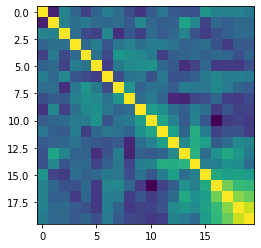

In [12]:
corr = np.zeros_like(covj)
for i in range(20):
    for j in range(20):
        corr[i,j] = covj[i,j]/np.sqrt(covj[i,i]*covj[j,j])
plt.imshow(corr)

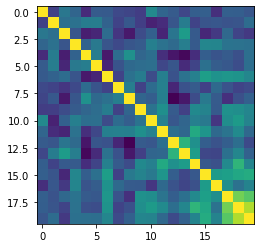